## Sentiment Analysis "Online Lectures" in Indonesia

In [23]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import twint
import nest_asyncio
nest_asyncio.apply()

#!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

In [24]:
tweets_data = pd.read_csv('tweet_all.csv')

/tmp/ipykernel_1754887/814437756.py:1: DtypeWarning: Columns (0,1,5,6,9,15,16,17,21,23,25,26,27,28,29,30,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_data = pd.read_csv('tweet_all.csv')


In [25]:
tweets_data.count()

id                 22858
conversation_id    22858
created_at         22858
date               22858
time               22858
timezone           22858
user_id            22858
username           22858
name               22847
place                  2
tweet              22858
language           22858
mentions           22858
urls               22858
photos             22858
replies_count      22858
retweets_count     22858
likes_count        22858
hashtags           22858
cashtags           22858
link               22858
retweet            22858
quote_url           1373
video              22858
thumbnail           6133
near                   1
geo                    1
source                 1
user_rt_id             1
user_rt                1
retweet_id             1
reply_to           22858
retweet_date           1
translate              1
trans_src              1
trans_dest             1
dtype: int64

In [26]:
tweets = tweets_data[['id', 'username', 'created_at', 'tweet', 'replies_count', 'retweets_count', 'likes_count']]

In [27]:
tweets

,id,username,created_at,tweet,replies_count,retweets_count,likes_count
0,1570685467607334913,skinatvelvet,2022-09-16 15:06:12 WIB,"sunscreen kalau mengancam kesehatan pasti udah ditarik dari peredaran, dan jika memang ada warning, pasti di badan produk akan tertera, jadi ndak usah takut, kalau ragu dengan pemakaian terhadap kesehatan, silahkan konsultasi ke expert 🫡",0,0,0
1,1570684965087768576,somewhat_pain,2022-09-16 15:04:12 WIB,dasar munafik,0,0,0
2,1570684481572315137,racunskincareee,2022-09-16 15:02:16 WIB,✨ Rekomendasi AZARINE HYDRASHOOTHE SUNSCREEN GEL SPF45 PA++++ 50ml PERAWATAN KECANTIKANBPOM HALAL ✨ https://t.co/yP4tdvE4hK https://t.co/8gcrXZHtDz,0,0,0
3,1570684425129824257,2324march,2022-09-16 15:02:03 WIB,@ohmybeautybank Maaf oot. Tapi ada yg tau gasi cara ngilangin noda bekas sunscreen gimana? Jilbabku putih jadi kuning-kuning gitu 😞😭,0,0,0
4,1570684051857764352,la_lalijah,2022-09-16 15:00:34 WIB,Terakhir ada sunscreen! Pake whitelab udh dua tube xixixi https://t.co/9kV57azvQe,1,0,0
...,...,...,...,...,...,...,...
22853,1567482691507093504,nanaskinjourney,2022-09-07 18:59:30 WIB,"GILASIH, Cuma 4 hari bias hempas jerawat tanpa bekas Padahal biasanya perlu pake toner dan serum acne. Ini acnespot yang ga bikin cekat-cekit dari awal kupakai, Terbukti aman buat kulit yang sensitive",1,0,0
22854,1567482575249371137,markcity028,2022-09-07 18:59:03 WIB,Mau ganti toner mending yg mana yaa pyunkang yul / npure / avo ysb ?,0,0,0
22855,1567482541271314433,jualan_base,2022-09-07 18:58:54 WIB,"Jb guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma 99k, kali aja ada yang minat, boleh ke aku ya, thx https://t.co/1mgFmbyacI",1,0,0
22856,1567482221661126657,jualanmenfess,2022-09-07 18:57:38 WIB,"Jm guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma 99k, kali aja ada yang minat, boleh ke aku ya, thx https://t.co/orJntf3Ljz",3,0,0


In [28]:
# Some functions for preprocessing text
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
 

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package punkt to /home/alim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#UBAH KE PY
# Preprocessing tweets data

tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['tweet'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
#tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

#Export to csv file
tweets.to_csv(r'clean_tweets.csv', index = False, header = True,index_label=None)

tweets

,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed
0,1570685467607334913,skinatvelvet,2022-09-16 15:06:12 WIB,0,0,0,sunscreen kalau mengancam kesehatan pasti udah ditarik dari peredaran dan jika memang ada warning pasti di badan produk akan tertera jadi ndak usah takut kalau ragu dengan pemakaian terhadap kesehatan silahkan konsultasi ke expert 🫡,"[sunscreen, mengancam, kesehatan, udah, ditarik, peredaran, warning, badan, produk, tertera, ndak, takut, ragu, pemakaian, kesehatan, silahkan, konsultasi, expert, 🫡]"
1,1570684965087768576,somewhat_pain,2022-09-16 15:04:12 WIB,0,0,0,dasar munafik,"[dasar, munafik]"
2,1570684481572315137,racunskincareee,2022-09-16 15:02:16 WIB,0,0,0,✨ rekomendasi azarine hydrashoothe sunscreen gel spf pa ml perawatan kecantikanbpom halal ✨,"[✨, rekomendasi, azarine, hydrashoothe, sunscreen, gel, spf, pa, ml, perawatan, kecantikanbpom, halal, ✨]"
3,1570684425129824257,2324march,2022-09-16 15:02:03 WIB,0,0,0,maaf oot tapi ada yg tau gasi cara ngilangin noda bekas sunscreen gimana jilbabku putih jadi kuningkuning gitu 😞😭,"[maaf, oot, yg, tau, gasi, ngilangin, noda, bekas, sunscreen, gimana, jilbabku, putih, kuningkuning, gitu, 😞😭]"
4,1570684051857764352,la_lalijah,2022-09-16 15:00:34 WIB,1,0,0,terakhir ada sunscreen pake whitelab udh dua tube xixixi,"[sunscreen, pake, whitelab, udh, tube, xixixi]"
...,...,...,...,...,...,...,...,...
22853,1567482691507093504,nanaskinjourney,2022-09-07 18:59:30 WIB,1,0,0,gilasih cuma hari bias hempas jerawat tanpa bekas padahal biasanya perlu pake toner dan serum acne ini acnespot yang ga bikin cekatcekit dari awal kupakai terbukti aman buat kulit yang sensitive,"[gilasih, bias, hempas, jerawat, bekas, pake, toner, serum, acne, acnespot, ga, bikin, cekatcekit, kupakai, terbukti, aman, kulit, sensitive]"
22854,1567482575249371137,markcity028,2022-09-07 18:59:03 WIB,0,0,0,mau ganti toner mending yg mana yaa pyunkang yul npure avo ysb,"[ganti, toner, mending, yg, yaa, pyunkang, yul, npure, avo, ysb]"
22855,1567482541271314433,jualan_base,2022-09-07 18:58:54 WIB,1,0,0,jb guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma k kali aja ada yang minat boleh ke aku ya thx,"[jb, guys, tokoku, promo, toner, vitamin, c, avoskin, k, kali, aja, minat, ya, thx]"
22856,1567482221661126657,jualanmenfess,2022-09-07 18:57:38 WIB,3,0,0,jm guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma k kali aja ada yang minat boleh ke aku ya thx,"[jm, guys, tokoku, promo, toner, vitamin, c, avoskin, k, kali, aja, minat, ya, thx]"


In [30]:
# Because preprocessing tweets data takes a lot time, so I load tweets data which has been preprocessed before
tweets = pd.read_csv('clean_tweets.csv')

for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = str(tweets['text_preprocessed'][i]).replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)
        
    tweets['text_preprocessed'][i] = list_words   
    
tweets

,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed
0,1570685467607334913,skinatvelvet,2022-09-16 15:06:12 WIB,0,0,0,sunscreen kalau mengancam kesehatan pasti udah ditarik dari peredaran dan jika memang ada warning pasti di badan produk akan tertera jadi ndak usah takut kalau ragu dengan pemakaian terhadap kesehatan silahkan konsultasi ke expert 🫡,"[sunscreen, mengancam, kesehatan, udah, ditarik, peredaran, warning, badan, produk, tertera, ndak, takut, ragu, pemakaian, kesehatan, silahkan, konsultasi, expert, \U0001fae1]"
1,1570684965087768576,somewhat_pain,2022-09-16 15:04:12 WIB,0,0,0,dasar munafik,"[dasar, munafik]"
2,1570684481572315137,racunskincareee,2022-09-16 15:02:16 WIB,0,0,0,✨ rekomendasi azarine hydrashoothe sunscreen gel spf pa ml perawatan kecantikanbpom halal ✨,"[✨, rekomendasi, azarine, hydrashoothe, sunscreen, gel, spf, pa, ml, perawatan, kecantikanbpom, halal, ✨]"
3,1570684425129824257,2324march,2022-09-16 15:02:03 WIB,0,0,0,maaf oot tapi ada yg tau gasi cara ngilangin noda bekas sunscreen gimana jilbabku putih jadi kuningkuning gitu 😞😭,"[maaf, oot, yg, tau, gasi, ngilangin, noda, bekas, sunscreen, gimana, jilbabku, putih, kuningkuning, gitu, 😞😭]"
4,1570684051857764352,la_lalijah,2022-09-16 15:00:34 WIB,1,0,0,terakhir ada sunscreen pake whitelab udh dua tube xixixi,"[sunscreen, pake, whitelab, udh, tube, xixixi]"
...,...,...,...,...,...,...,...,...
18269,1567482691507093504,nanaskinjourney,2022-09-07 18:59:30 WIB,1,0,0,gilasih cuma hari bias hempas jerawat tanpa bekas padahal biasanya perlu pake toner dan serum acne ini acnespot yang ga bikin cekatcekit dari awal kupakai terbukti aman buat kulit yang sensitive,"[gilasih, bias, hempas, jerawat, bekas, pake, toner, serum, acne, acnespot, ga, bikin, cekatcekit, kupakai, terbukti, aman, kulit, sensitive]"
18270,1567482575249371137,markcity028,2022-09-07 18:59:03 WIB,0,0,0,mau ganti toner mending yg mana yaa pyunkang yul npure avo ysb,"[ganti, toner, mending, yg, yaa, pyunkang, yul, npure, avo, ysb]"
18271,1567482541271314433,jualan_base,2022-09-07 18:58:54 WIB,1,0,0,jb guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma k kali aja ada yang minat boleh ke aku ya thx,"[jb, guys, tokoku, promo, toner, vitamin, c, avoskin, k, kali, aja, minat, ya, thx]"
18272,1567482221661126657,jualanmenfess,2022-09-07 18:57:38 WIB,3,0,0,jm guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma k kali aja ada yang minat boleh ke aku ya thx,"[jm, guys, tokoku, promo, toner, vitamin, c, avoskin, k, kali, aja, minat, ya, thx]"


### Determine Sentiment Polarity of Tweets with Indonesia Sentiment Lexicon

In [31]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [32]:
# Results from determine sentiment polarity of tweets

results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file
# tweets.to_csv(r'25k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)

tweets

negative    7067
positive    7037
neutral     4170
Name: polarity, dtype: int64


,id,username,created_at,replies_count,retweets_count,likes_count,text_clean,text_preprocessed,polarity_score,polarity
0,1570685467607334913,skinatvelvet,2022-09-16 15:06:12 WIB,0,0,0,sunscreen kalau mengancam kesehatan pasti udah ditarik dari peredaran dan jika memang ada warning pasti di badan produk akan tertera jadi ndak usah takut kalau ragu dengan pemakaian terhadap kesehatan silahkan konsultasi ke expert 🫡,"[sunscreen, mengancam, kesehatan, udah, ditarik, peredaran, warning, badan, produk, tertera, ndak, takut, ragu, pemakaian, kesehatan, silahkan, konsultasi, expert, \U0001fae1]",-3,negative
1,1570684965087768576,somewhat_pain,2022-09-16 15:04:12 WIB,0,0,0,dasar munafik,"[dasar, munafik]",0,neutral
2,1570684481572315137,racunskincareee,2022-09-16 15:02:16 WIB,0,0,0,✨ rekomendasi azarine hydrashoothe sunscreen gel spf pa ml perawatan kecantikanbpom halal ✨,"[✨, rekomendasi, azarine, hydrashoothe, sunscreen, gel, spf, pa, ml, perawatan, kecantikanbpom, halal, ✨]",-5,negative
3,1570684425129824257,2324march,2022-09-16 15:02:03 WIB,0,0,0,maaf oot tapi ada yg tau gasi cara ngilangin noda bekas sunscreen gimana jilbabku putih jadi kuningkuning gitu 😞😭,"[maaf, oot, yg, tau, gasi, ngilangin, noda, bekas, sunscreen, gimana, jilbabku, putih, kuningkuning, gitu, 😞😭]",-12,negative
4,1570684051857764352,la_lalijah,2022-09-16 15:00:34 WIB,1,0,0,terakhir ada sunscreen pake whitelab udh dua tube xixixi,"[sunscreen, pake, whitelab, udh, tube, xixixi]",0,neutral
...,...,...,...,...,...,...,...,...,...,...
18269,1567482691507093504,nanaskinjourney,2022-09-07 18:59:30 WIB,1,0,0,gilasih cuma hari bias hempas jerawat tanpa bekas padahal biasanya perlu pake toner dan serum acne ini acnespot yang ga bikin cekatcekit dari awal kupakai terbukti aman buat kulit yang sensitive,"[gilasih, bias, hempas, jerawat, bekas, pake, toner, serum, acne, acnespot, ga, bikin, cekatcekit, kupakai, terbukti, aman, kulit, sensitive]",-5,negative
18270,1567482575249371137,markcity028,2022-09-07 18:59:03 WIB,0,0,0,mau ganti toner mending yg mana yaa pyunkang yul npure avo ysb,"[ganti, toner, mending, yg, yaa, pyunkang, yul, npure, avo, ysb]",-1,negative
18271,1567482541271314433,jualan_base,2022-09-07 18:58:54 WIB,1,0,0,jb guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma k kali aja ada yang minat boleh ke aku ya thx,"[jb, guys, tokoku, promo, toner, vitamin, c, avoskin, k, kali, aja, minat, ya, thx]",13,positive
18272,1567482221661126657,jualanmenfess,2022-09-07 18:57:38 WIB,3,0,0,jm guys tokoku lagi ada promo untuk toner vitamin c avoskin cuma k kali aja ada yang minat boleh ke aku ya thx,"[jm, guys, tokoku, promo, toner, vitamin, c, avoskin, k, kali, aja, minat, ya, thx]",13,positive


### Analysis and Visualization

### Comparasion Sentiment Polarity on Tweets Data

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

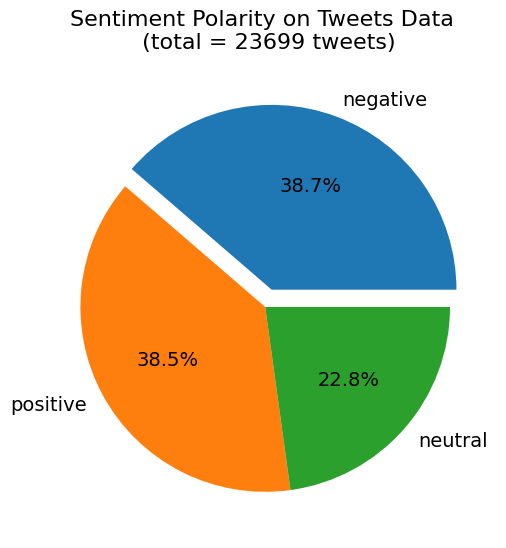

In [34]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)
plt.show()

In [35]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,alhamdulillah paket promo sale nya sampai dengan selamat dirumah’ makasih seringsering promo gedenya yak beruntung banget bisa dapet serum drop of youth best seller setengah harga dari harga asli 😍😊,36,positive
2,bismillah ya allah mudah mudahan rezekiku aku lagi pengen bnget produk avoskin ysb sunscreen karna kulitku super sensitif dan aku udah coba beberapa merk sunscreen blom ada yg cocok di kulitku huhu mudah mudahan aku bisa menang dan nyoba avoskin berharap cocok aamiin,32,positive
3,ya allah baru inget belum beli lip serum lip mask pashmina juga ya allah berikan nisa semangat kerja ya allah 😭,31,positive
4,done ka bismillah makasi banyak ya ka semoga selalu sehat selalu bahagia semoga dimudahkan segala sesuatunya baik itu rejeki urusan kegiatan dan banyak hal baik lainnya ya ka😽 makasih sekali lagi ily💗 pastinya mau nyoba yang skintific ceramide moisturizer gel,29,positive
5,secara texture produk ini cair banget bukan kental gitu dari wangi juga enak wangi calendula banget aku udah coba beberapa toner calendula ya wanginya kaya begini karena cair banget pas diratain tuh ya udah langsung meresap kaya difoto ga keliatan basah kan,29,positive
6,terus pas pertengahan aku bener bener pake basic skincare yang harganya lebih murah dari dokter facial wash safi yang oren toner viva green tea mois safi yang green tea itu beneran sembuh tapi harus sabar sampe temen sama sodara juga nyoba terus ya pada sembuh juga,28,positive
7,bismillahirrahmanirrahim semoga ini jadi rezeki ya allah aamiin ya rabbal alamin ya allah,27,positive
8,bismillah hari ini menang giveaway di makji ya allah aamiin ya rabbal alamin ya allah,27,positive
9,alo 👋🏻 aku mau umumim pemenang giveaway serum nutrishe ya selamat buat akan aku dm untuk klaim hadiahnya ya buat temen temen yang sudah ikutan semoga beruntung di giveaway selanjutnya ya 💓,25,positive
10,asli seneng banget bisa sharingsharing disini dan sama sama belajar tentang skincare kalo kamu suka bisa like dan retweet tweet ini agar lebih bermanfaat dan tersebar luas happy watching,25,positive


In [36]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,idn aku juga pernah kaya gitu nder kalo aku dulu salah banget karna bruntusan aku pake macem macem dari mulai exfoliasi obat totol jerawat serum dll dah tapi ternyata aku salah nder soalnya mukaku bruntusan itu gara gara skin barrier aku rusak gara gara salah skincare,-41,negative
2,gue awalnya gk insecure sama jerawat cuma waktu awal pandemi parah bgt udh stress mikirin ekonomi kuliah gue berenti breakout parah tambah mak gue bencanda gak lucu bilang kok muka gue jadi ancur katanya dr situ gue insecure bgt segala sabun muka obat jerawat dicoba,-33,negative
3,klen tw kn trkadang hbis cuci muka enih masi ad aj kotoran yg tdk bersih nah toner ini bs mnolong membersihkan sisa kotoran minyak dn makeup yang tidak terangkat saat pke susu pembersih atw sabun pembersih wajah,-31,negative
4,tw bekas luka campak sender th kena campak bekas ruam amp lentingnya parah kek gini bisa hilang gk ya huhu udah cemas duluan liatnya takut susah ilang bb,-30,negative
5,mukaku lagi byk bekas jerawat hitam apalagi di pipi udh month liat di deskripsinya glycolic acid serum ini bisa menyamarkan noda hitam dlm minggu jd penasaran sm serumnya krn bulan dpn mau ada acara wisuda kaka pgn deh noda hitam hilang scepatnya biar makeupku bagus max,-29,negative
6,sorry kka baru liatt jdi itu moisturizer awal nya aku pake mako di jdi tambah parah terus ragu bli itu dan mnrt aku cpt bgt si perubahan apalagi di pke di jrwt merah cpt muda trs bruntusan jg cpt ilang blm abis satu udh keliatan pls vitc nic biar jrwt item ilang sj aku,-28,negative
7,💜essence membersihkan kotoran dan minyak yang tersumbat di dalam kulit menarik keluar whitehead amp blackhead mengecilkan liang pori 💜serum kawal minyak berlebihan dan mengecutkan jerawat dengan cepat 💜moisturiser memudarkan parut jerawat sertakan mencerahkan,-27,negative
8,pakeinn moisturizer nder aku sering kayak gitu gara” kulitku kering banget kalo di kaki biasanya karena kotor bisa juga reaksi alergi mungkin kamu habis pegang apa gitu yang nge trigger alergi muncul kalo aku biasanya cuci dulu trus pakein minyak kelapa,-27,negative
9,hate my hair rn skip toner nak beli facial razor ah worth it dak nak threading hujung bulan ni 🧐 should i get that skintific brightening serum since safi punya dah nak habis 🤔 org lain berus lidah amp bibir dak hmm 🙃 ugh bila parut ni nak hilang sikit lagi ni 😅,-27,negative
10,kemaren balik dr jogja sempet ngerasa bibir kering bgt awalnya mikir gegara kurang minum trus banyakin minum sama pake lip serum biar ga kering bgt hari tbtb muncul bintik kecil berair tp banyak di bibir yg ternyata alergi lip serum,-26,negative


### Word Cloud

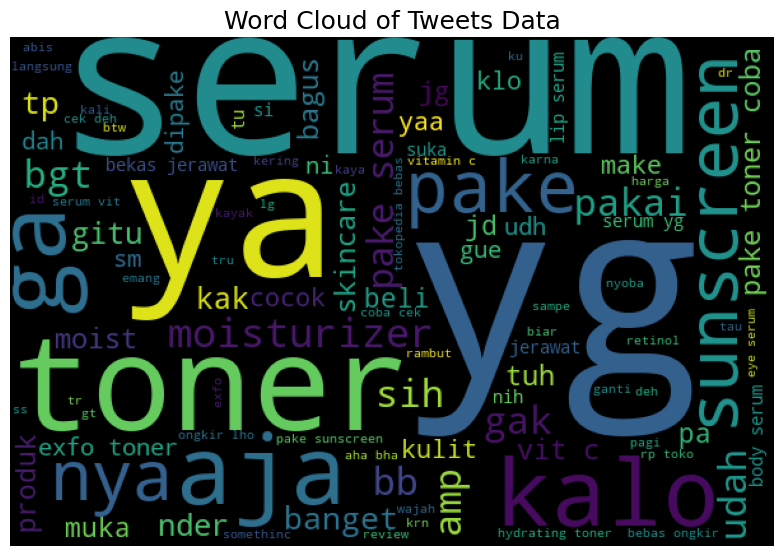

In [37]:
# Visualize word cloud

list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

### Positive and Negative Word Cloud

In [38]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

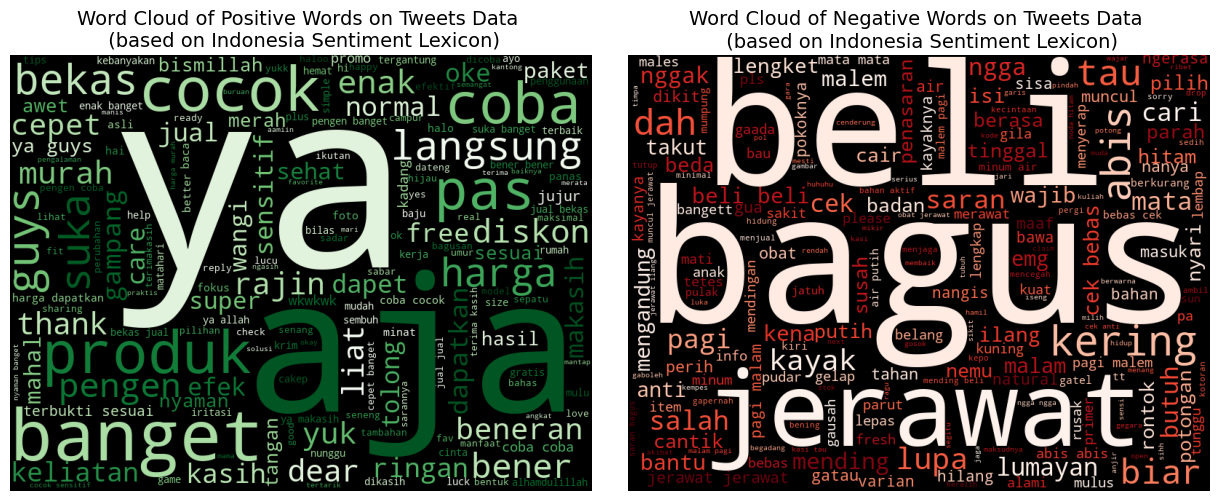

In [39]:
# Visualize positive and negative word cloud

sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()


### Counts of Tweets Created based on Hours

In [65]:
import seaborn as sns
sns.set(style = 'whitegrid')
import datetime as dt

# Visualize counts of tweets created based on hours

#pd.plotting.register_matplotlib_converters()
tweets_created = pd.DataFrame()
tweets_created['created_at'] = tweets['created_at'].str.split(' ', expand = True)[1]
tweets_created['created_at'] = pd.to_datetime(tweets_created['created_at'])
tweets_created['created_at']= tweets_created['created_at'].dt.round('H')
tweets_created['created_at'] = tweets_created['created_at'].dt.time
tweets_created

,created_at
0,15:00:00
1,15:00:00
2,15:00:00
3,15:00:00
4,15:00:00
...,...
18269,19:00:00
18270,19:00:00
18271,19:00:00
18272,19:00:00


In [66]:
dataBaru = pd.DataFrame(y_values)
dataBaru['time'] = dataBaru.index
dataBaru.reset_index(inplace = True)
dataBaru['time'] = dataBaru['time'].astype(str)
dataBaru.drop
dataBaru

,index,created_at,time
0,00:00:00,558,00:00:00
1,01:00:00,265,01:00:00
2,02:00:00,120,02:00:00
3,03:00:00,94,03:00:00
4,04:00:00,74,04:00:00
5,05:00:00,163,05:00:00
6,06:00:00,433,06:00:00
7,07:00:00,564,07:00:00
8,08:00:00,714,08:00:00
9,09:00:00,912,09:00:00


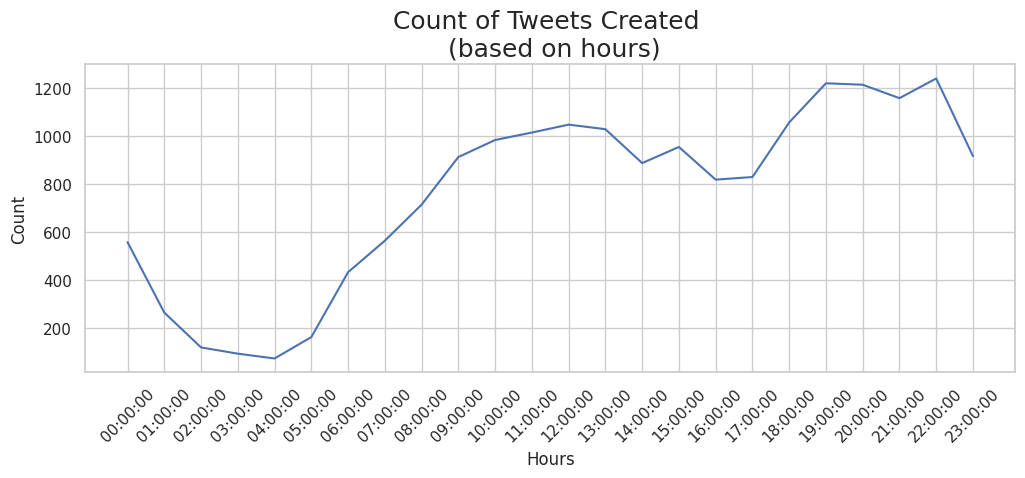

In [67]:
import seaborn as sns
sns.set(style = 'whitegrid')
import datetime as dt

# Visualize counts of tweets created based on hours

#pd.plotting.register_matplotlib_converters()
tweets_created = pd.DataFrame()
tweets_created['created_at'] = tweets['created_at'].str.split(' ', expand = True)[1]
tweets_created['created_at'] = pd.to_datetime(tweets_created['created_at'])
tweets_created['created_at']= tweets_created['created_at'].dt.round('H')
tweets_created['created_at'] = tweets_created['created_at'].dt.time
tweets_created

fig, ax = plt.subplots(figsize = (12, 4))
x_values = tweets_created['created_at'].value_counts().sort_index().index
y_values = tweets_created['created_at'].value_counts().sort_index()

sns.lineplot(ax = ax, data = dataBaru, x ='time', y = 'created_at')

ax.set_title('Count of Tweets Created \n (based on hours)', fontsize = 18)
ax.set_xlabel('Hours')
ax.set_xticks(dataBaru['time'])
ax.set_xticklabels(dataBaru['time'], rotation = 45)
ax.set_ylabel('Count')
plt.show()